# Hotel Booking Demand Introduction

Hotel booking cancellations create uncertainty for hotels. When too many guests cancel, hotels lose revenue and may have empty rooms. If hotels overbook to compensate, they risk customer dissatisfaction. Therefore, understanding why cancellations happen and predicting which bookings are likely to cancel is very important for hotel planning and revenue management.

In this project, we use the Hotel Booking Demand dataset to analyze  historical booking data from City Hotel and Resort Hotel. First, we explore the data to understand how cancellation behavior relates to factors such as booking time, customer type, country, deposit type, and booking channel.

Next, we build prediction models to forecast whether a booking will be canceled (is_canceled). We compare Random Forest, XGBoost, and Logistic Regression using ROC and AUC to evaluate performance.

THe goal of this project is to understand cancellation behavior and predict cancellation risk using data.

# 1. Load and Read Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

ss = StandardScaler()


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

# display
pd.set_option("display.max_columns", 100)

from pathlib import Path

In [2]:
REPO_ROOT = Path.cwd()
while not (REPO_ROOT / ".git").exists():
    REPO_ROOT = REPO_ROOT.parent

DATA_PATH = REPO_ROOT / "data" / "hotel_bookings.csv"

df = pd.read_csv(DATA_PATH)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


***Booking Information***

- hotel – Type of hotel (City Hotel or Resort Hotel).

- is_canceled – Whether the booking was canceled (1 = Yes, 0 = No).

- lead_time – Number of days between booking date and arrival date.

***Arrival Date Information***

- arrival_date_year – Year of arrival.

- arrival_date_month – Month of arrival.

- arrival_date_week_number – Week number of arrival (1–53).

- arrival_date_day_of_month – Day of the month of arrival.

***Stay Duration***

- stays_in_weekend_nights – Number of weekend nights (Saturday/Sunday).

- stays_in_week_nights – Number of weekday nights (Monday–Friday).

***Guest Information***

- adults – Number of adults.

- children – Number of children.

- babies – Number of babies.

- country – Country of origin of the guest.

- is_repeated_guest – Whether the guest has stayed before (1 = Yes, 0 = No).

***Booking & Channel Information***

- market_segment – Market segment (e.g., Online Travel Agent, Direct, Corporate).

- distribution_channel – Booking channel (e.g., Travel Agent, Direct).

- agent – ID of the travel agency that made the booking.

- company – ID of the company that made the booking (if corporate).

***Booking History***

- previous_cancellations – Number of previous canceled bookings by the customer.

- previous_bookings_not_canceled – Number of previous bookings not canceled

***Room Information***

- reserved_room_type – Type of room originally reserved.

- assigned_room_type – Type of room assigned at check-in.

***Booking Modifications & Policy***

- booking_changes – Number of changes made to the booking.

- deposit_type – Deposit policy (No Deposit, Non Refund, Refundable).

- days_in_waiting_list – Number of days the booking was on the waiting list.

- reservation_status – Final booking status (Canceled, Check-Out, No-Show).

- reservation_status_date – Date when the reservation status was last updated.

***Pricing & Special Requests***

- adr – Average Daily Rate (average price per room per night).

- required_car_parking_spaces – Number of parking spaces required.

- total_of_special_requests – Number of special requests (e.g., extra bed, high floor).

- meal – Type of meal plan booked (e.g., BB = Bed & Breakfast).

In [3]:
# check the percentage of missing values in each column of the dataset
df.isnull().mean()

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

- A few variables such as children and country have very small amounts of missing data, which can be safely filled using simple methods like the mode. 
- Agent has about 13.7% missing values and company has over 94% missing values, which suggests these features may need special handling

# 2. EDA

## 2.1 Explore Feartures and Distributions

In [4]:
# summary stats to understand distribution, skewness
df.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.0,0.0,0.0,0.00,0.000,1.0,1.0,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,0.0,0.0,3.0,18.00,69.000,160.0,265.0,444.00,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2015.0,2015.0,2015.0,2016.00,2016.000,2017.0,2017.0,2017.00,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,2.0,5.0,8.0,16.00,28.000,38.0,46.0,53.00,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,1.0,2.0,4.0,8.00,16.000,23.0,28.0,31.00,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.0,0.0,0.0,0.00,1.000,2.0,2.0,4.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,0.0,0.0,1.0,1.00,2.000,3.0,5.0,10.00,50.0
adults,119390.0,1.856403,0.579261,0.00,1.0,1.0,1.0,2.00,2.000,2.0,2.0,3.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.0,0.0,0.0,0.00,0.000,0.0,0.0,2.00,10.0
babies,119390.0,0.007949,0.097436,0.00,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,10.0


- From the table, we can see that about 37% of bookings were canceled
- Some features such as previous_cancellations, required_car_parking_spaces, and babies are highly concentrated near zero, meaning most customers did not have these characteristics.

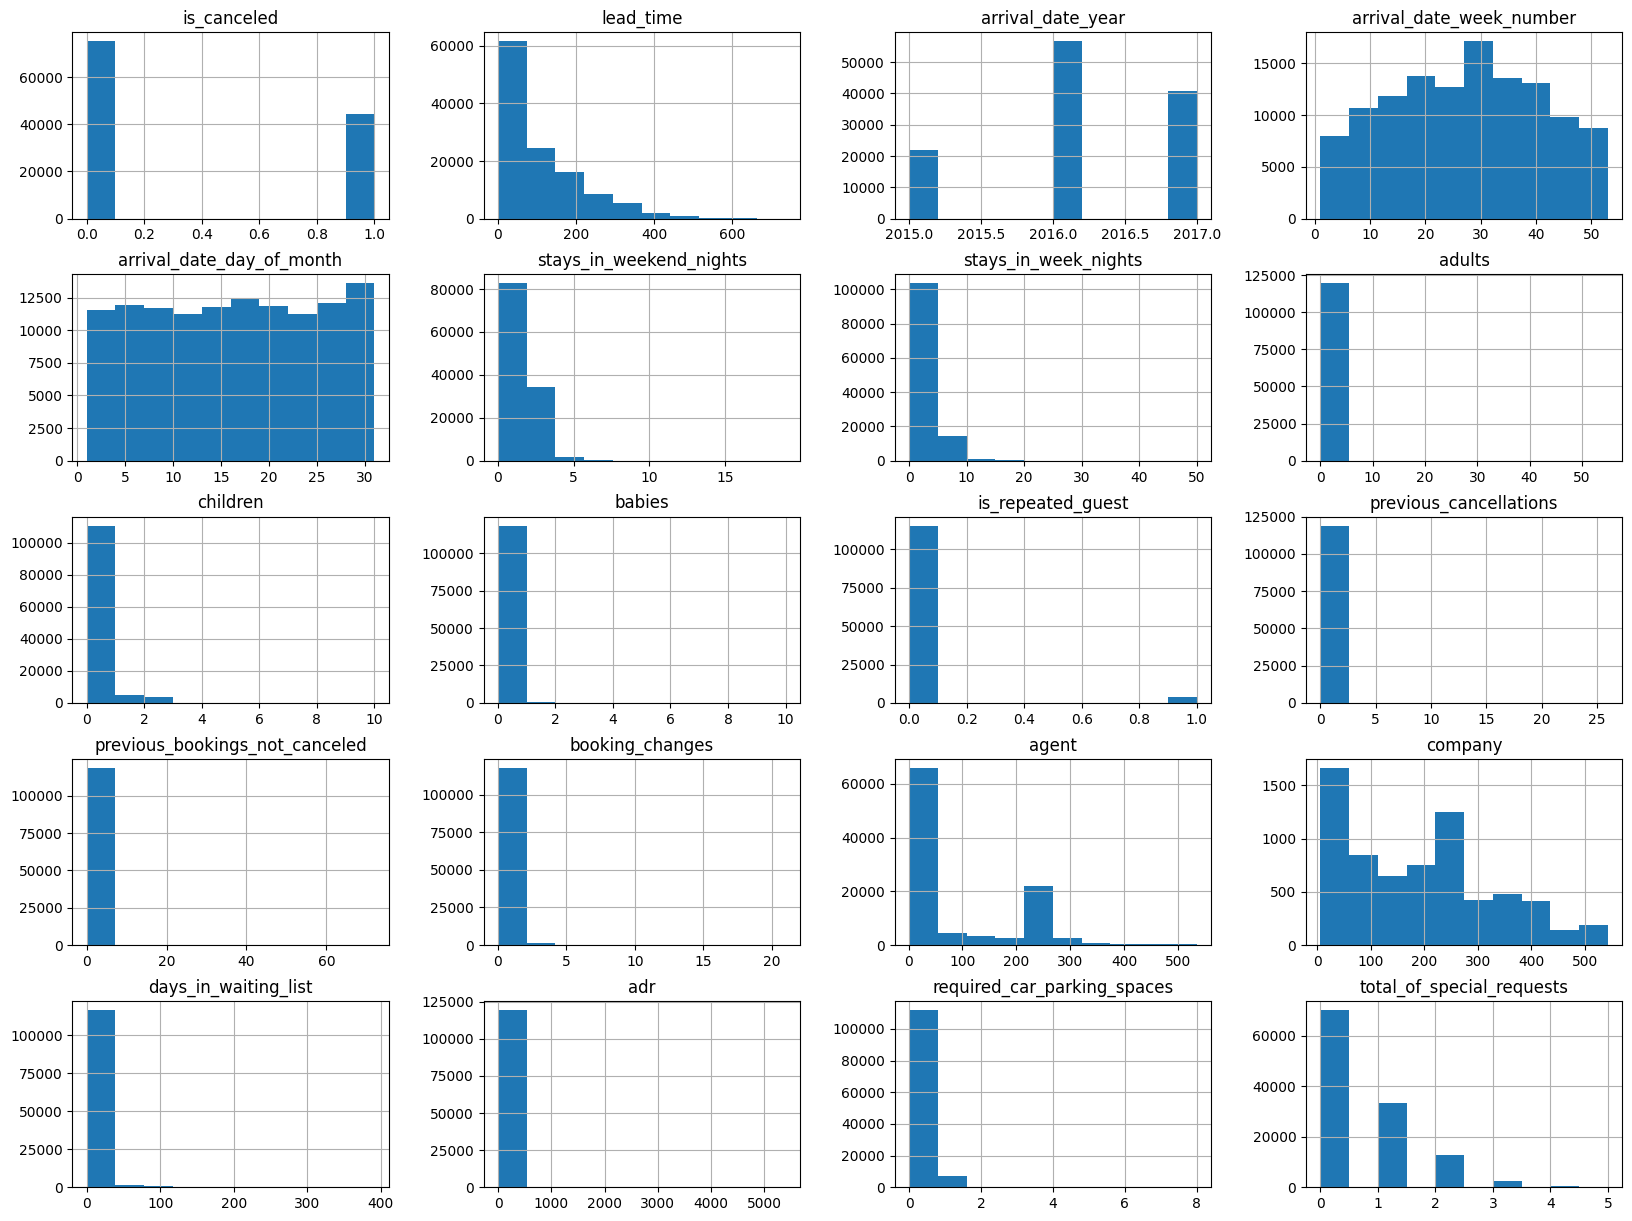

In [5]:
# histogram grid for numeric columns 
df.hist(figsize=(20, 15))
plt.show()

- lead_time is highly right-skewed, meaning most bookings are made relatively close to arrival, but some are booked very far in advance.

- stays_in_week_nights and stays_in_weekend_nights are concentrated at low values, showing that most guests stay only a few nights.

- previous_cancellations, previous_bookings_not_canceled, and booking_changes are heavily concentrated at zero, meaning most guests have no prior booking history or changes.

- is_repeated_guest is highly imbalanced, with most guests being new rather than returning.

- adr (average daily rate) shows a wide spread and extreme outliers, suggesting possible high-price bookings.

- days_in_waiting_list is mostly zero, indicating that most bookings were not on a waiting list.

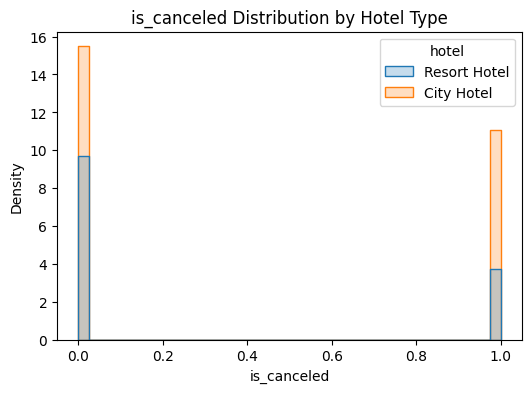

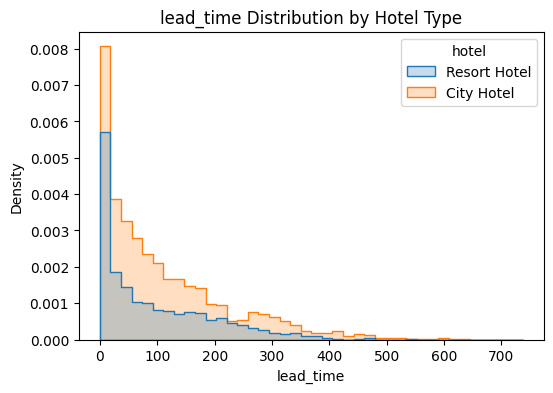

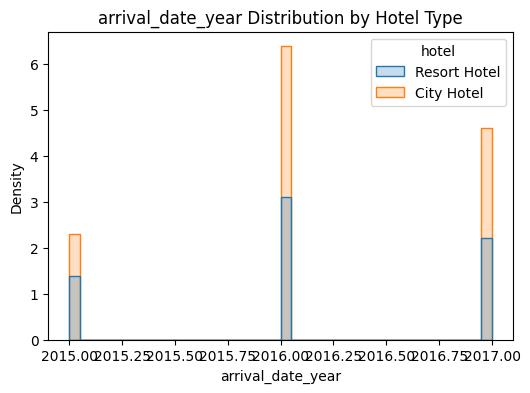

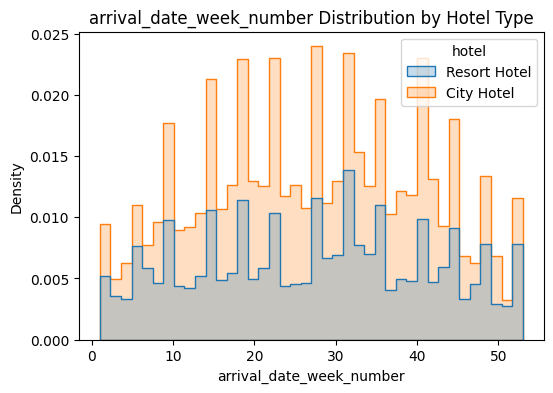

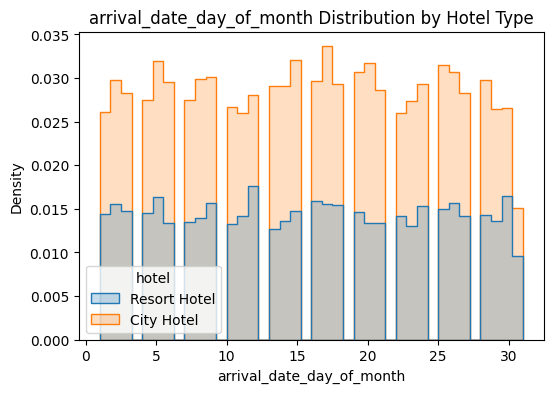

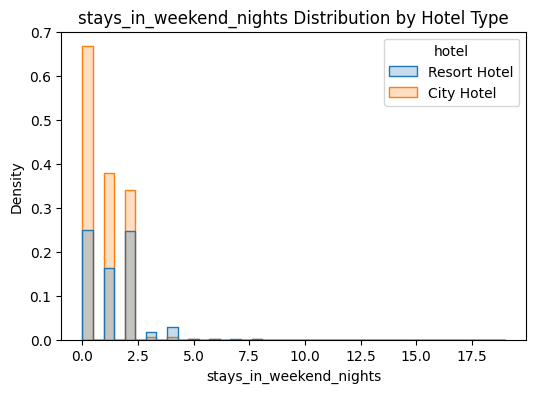

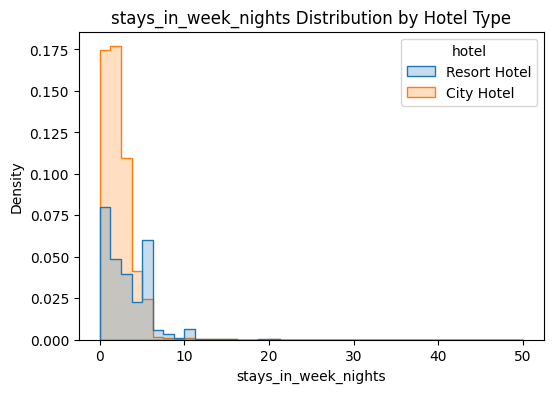

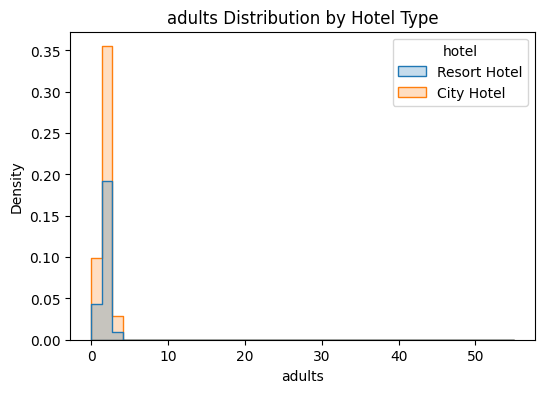

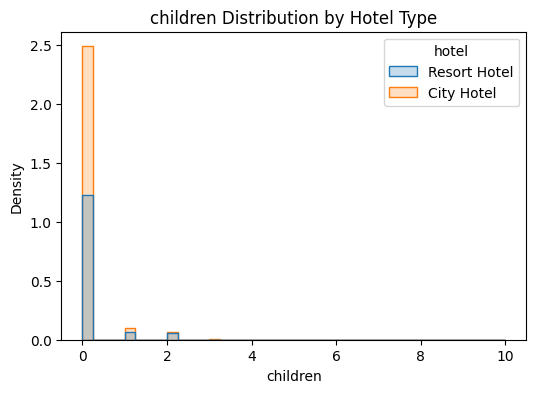

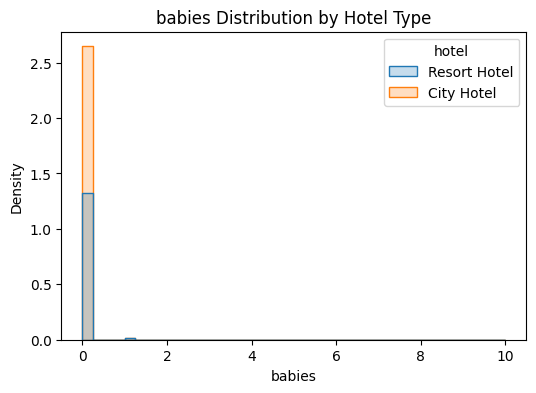

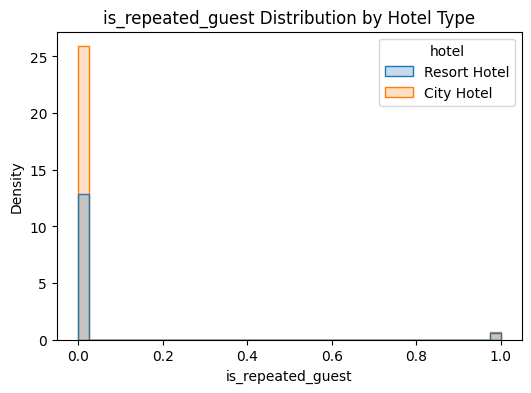

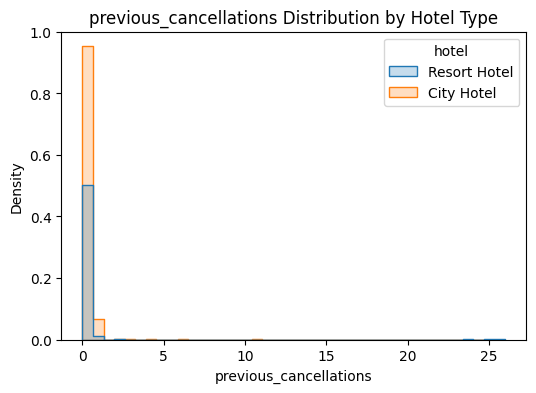

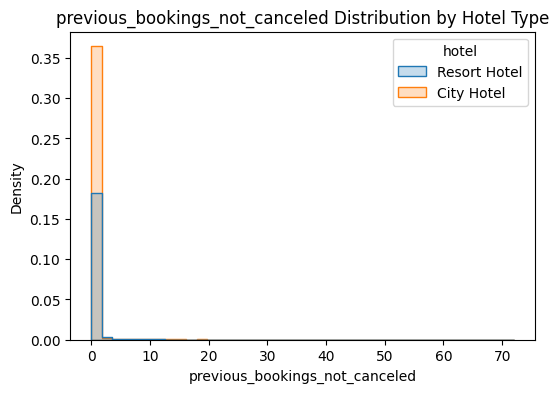

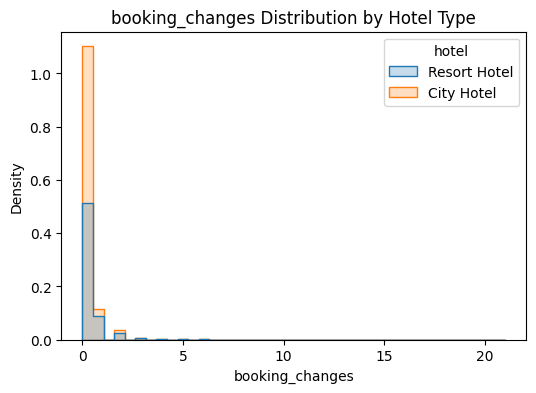

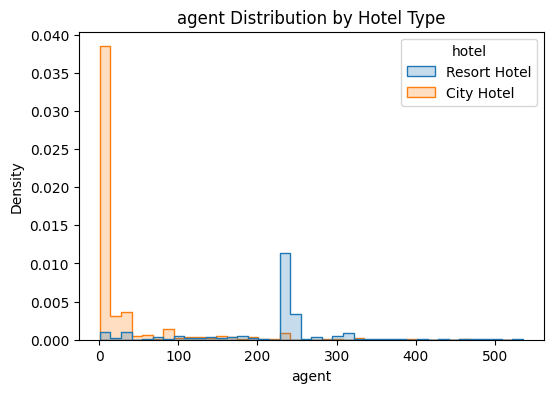

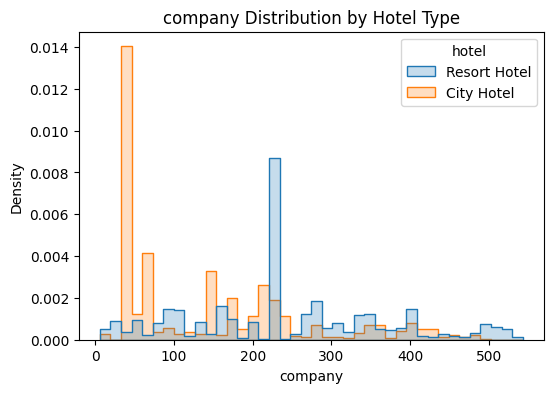

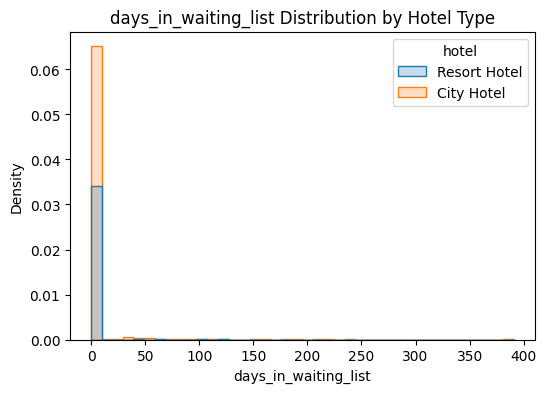

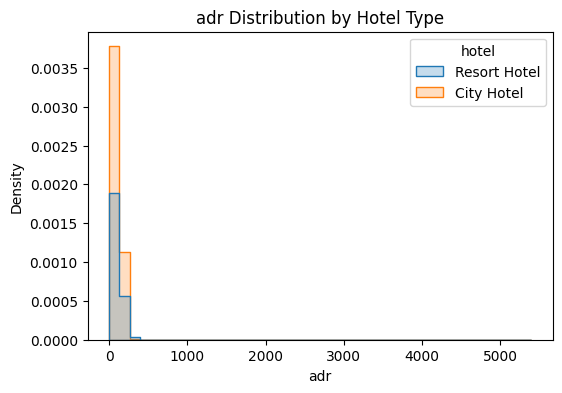

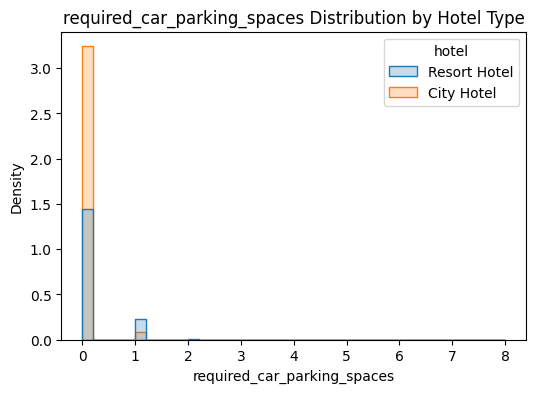

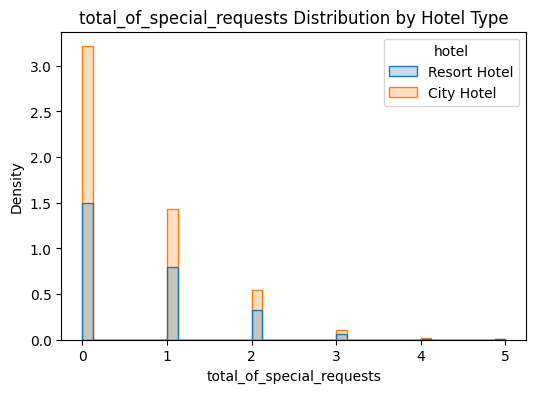

In [6]:
# look at city hotel and resort hotel seperatly 
df_city = df[df["hotel"] == "City Hotel"]
df_resort = df[df["hotel"] == "Resort Hotel"]

numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(
        data=df,
        x=col,
        hue="hotel",
        bins=40,
        stat="density",
        element="step"
    )
    plt.title(f"{col} Distribution by Hotel Type")
    plt.show()

## 2.2 Booking and Cancel Rate by Hotel

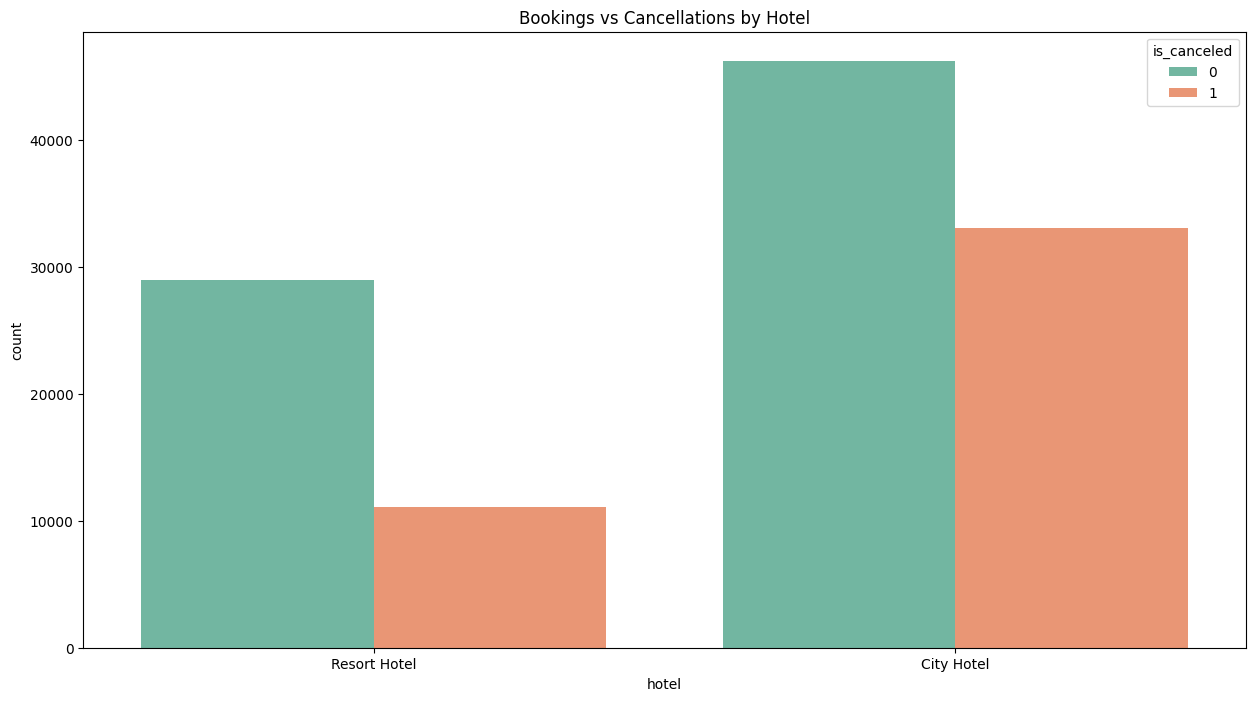

 Hotel Cancel Rate  
hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: count, dtype: float64


In [7]:
plt.figure(figsize=(15,8))
sns.countplot(x="hotel", data=df, hue="is_canceled", palette=sns.color_palette("Set2", 2))
plt.title("Bookings vs Cancellations by Hotel")
plt.show()

# cancel rate by hotel (like your printed output)
hotel_cancel = df.loc[df["is_canceled"]==1, "hotel"].value_counts() / df["hotel"].value_counts()
print("Hotel Cancel Rate".center(20), hotel_cancel, sep="\n")

## 2.3 Booking Patterns for Seasonality

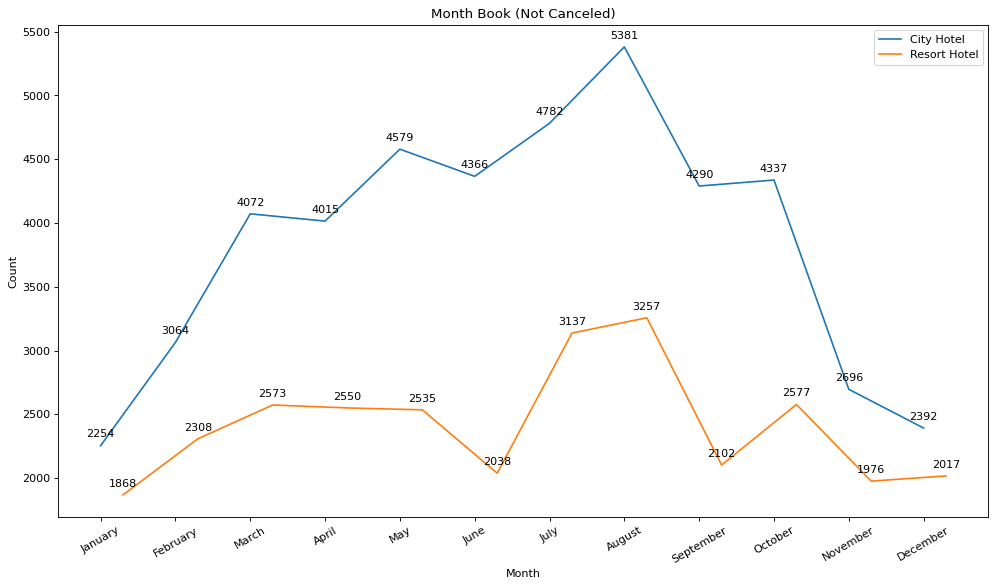

In [8]:
city_hotel   = df[(df["hotel"]=="City Hotel") & (df["is_canceled"]==0)].copy()
resort_hotel = df[(df["hotel"]=="Resort Hotel") & (df["is_canceled"]==0)].copy()

month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

city_month   = city_hotel["arrival_date_month"].value_counts().reindex(month_order)
resort_month = resort_hotel["arrival_date_month"].value_counts().reindex(month_order)

x  = np.arange(len(month_order))
x1 = x + 0.3
width = 0.3

plt.figure(figsize=(15,8), dpi=80)
plt.plot(x,  city_month.values,   label="City Hotel")
plt.plot(x1, resort_month.values, label="Resort Hotel")
plt.xticks(x, month_order, rotation=30)
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Month Book (Not Canceled)")
plt.legend()

for xx, yy in zip(x, city_month.values):
    plt.text(xx, yy+50, f"{int(yy)}", ha="center", va="bottom")
for xx, yy in zip(x1, resort_month.values):
    plt.text(xx, yy+50, f"{int(yy)}", ha="center", va="bottom")

plt.show()

- Both Resort Hotel and City Hotel show strong demand during the summer months, especially in July and August.


## 2.4 Customer Types and Booking Types

- Transient – Individual travelers booking independently (not part of a group or contract).

- Transient-Party – Individual travelers booking together as a small party, but not under a formal group contract.

- Contract – Bookings made under a negotiated contract, usually by companies or institutions.

- Group – Bookings made as part of a larger organized group (e.g., tour groups, events, conferences).

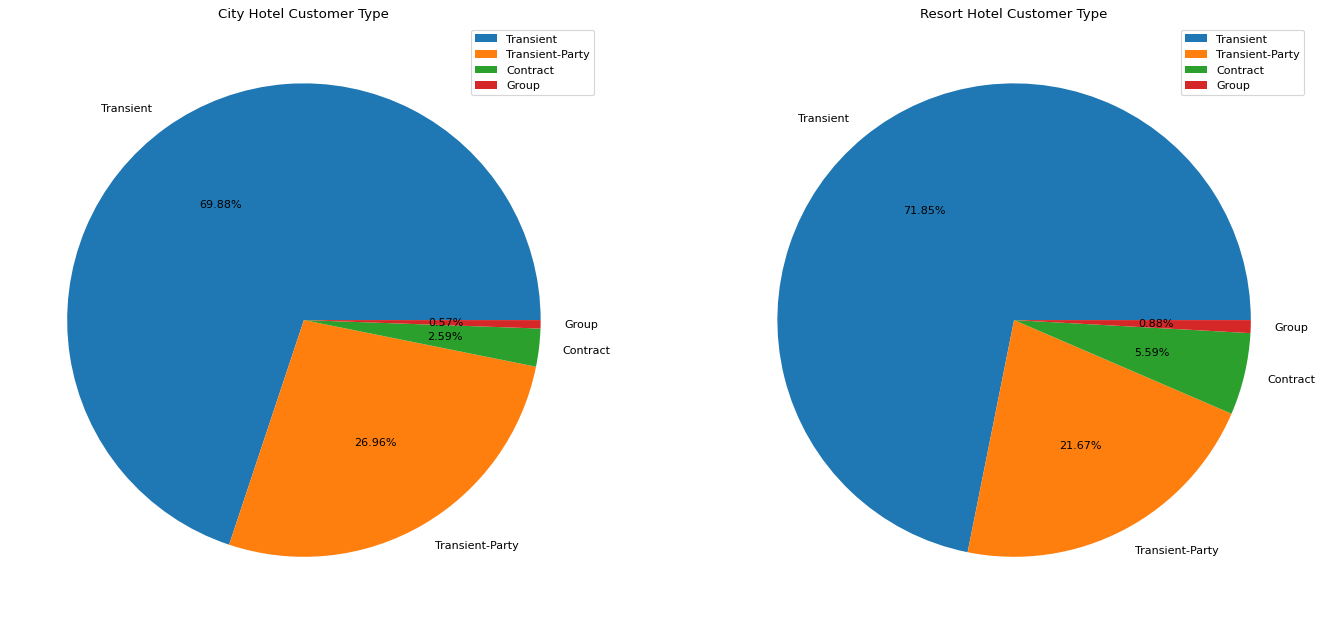

In [9]:
city_customer   = city_hotel["customer_type"].value_counts()
resort_customer = resort_hotel["customer_type"].value_counts()

plt.figure(figsize=(21,12), dpi=80)

plt.subplot(1,2,1)
plt.pie(city_customer, labels=city_customer.index, autopct="%.2f%%")
plt.legend(loc=1)
plt.title("City Hotel Customer Type")

plt.subplot(1,2,2)
plt.pie(resort_customer, labels=resort_customer.index, autopct="%.2f%%")
plt.legend()
plt.title("Resort Hotel Customer Type")

plt.show()

- Online TA – Booking made through an online travel agency (e.g., Booking.com, Expedia).

- Offline TA/TO – Booking made through an offline travel agency or tour operator.

- Direct – Customer booked directly with the hotel (website, phone, etc.).

- Groups – Booking made as part of an organized group.

- Corporate – Booking made by a company for business purposes.

- Complementary – Free bookings (no charge), often for promotions or VIP guests.

- Aviation – Bookings related to airline crew or aviation-related stays.

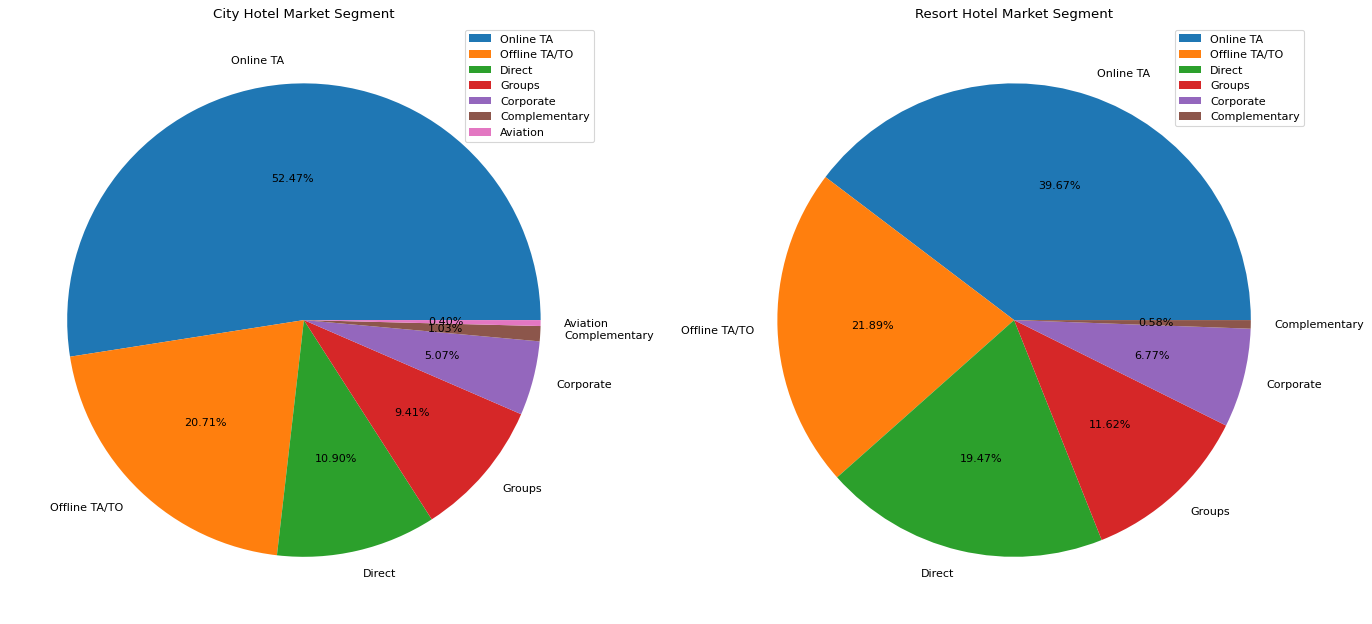

In [10]:
city_segment   = city_hotel["market_segment"].value_counts()
resort_segment = resort_hotel["market_segment"].value_counts()

plt.figure(figsize=(21,12), dpi=80)

plt.subplot(1,2,1)
plt.pie(city_segment, labels=city_segment.index, autopct="%.2f%%")
plt.legend()
plt.title("City Hotel Market Segment")

plt.subplot(1,2,2)
plt.pie(resort_segment, labels=resort_segment.index, autopct="%.2f%%")
plt.legend()
plt.title("Resort Hotel Market Segment")

plt.show()

## 2.5 Cancellation Behavior

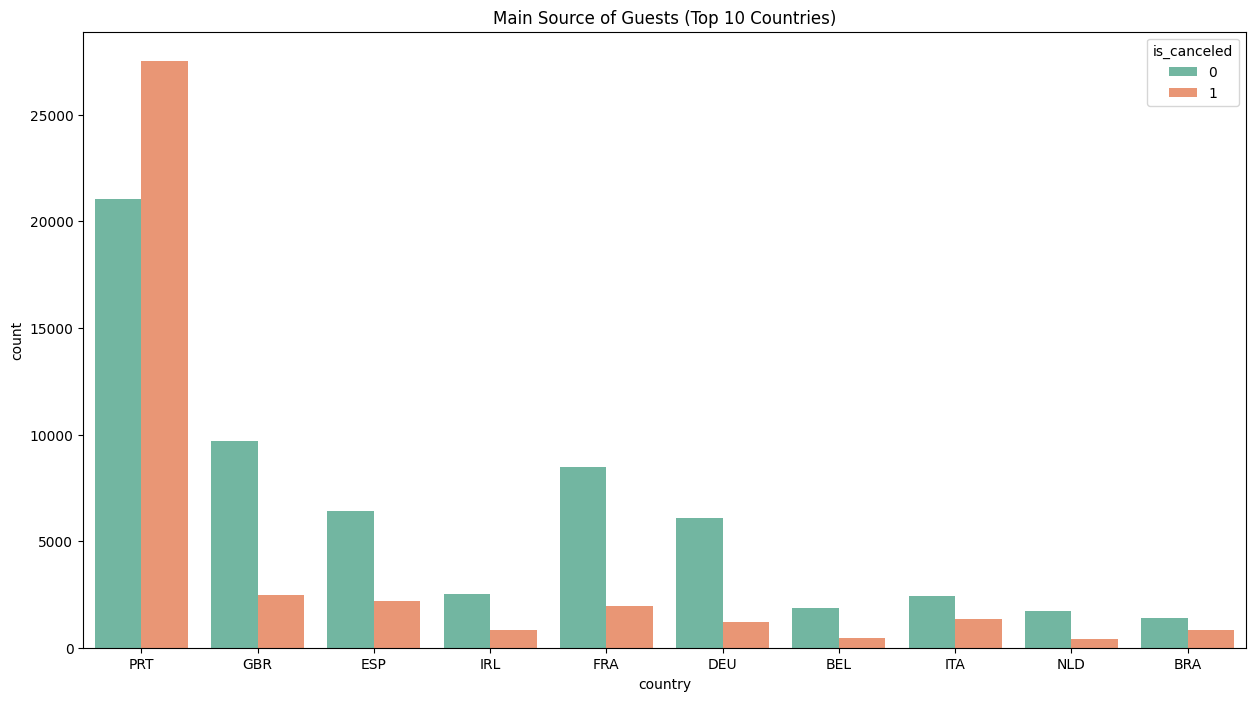

cancel rate by country
country
PRT    0.566351
BRA    0.373201
ITA    0.353956
ESP    0.254085
IRL    0.246519
BEL    0.202391
GBR    0.202243
FRA    0.185694
NLD    0.183935
DEU    0.167147
Name: count, dtype: float64


In [11]:
country_book = df["country"].value_counts()[:10]
country_cancel = df[(df["country"].isin(country_book.index)) & (df["is_canceled"]==1)]["country"].value_counts()

plt.figure(figsize=(15,8))
sns.countplot(
    x="country",
    data=df[df["country"].isin(country_book.index)],
    hue="is_canceled",
    palette=sns.color_palette("Set2", 2)
)
plt.title("Main Source of Guests (Top 10 Countries)")
plt.show()

country_cancel_rate = (country_cancel / country_book).sort_values(ascending=False)
print("cancel rate by country".center(10), country_cancel_rate, sep="\n")

- Among the main customer source countries, Portugal (PRT) has the highest cancellation rate, followed by Brazil (BRA) and Italy (ITA).
- The United Kingdom is also a major source of customers, although its cancellation rate is lower compared to Portugal.

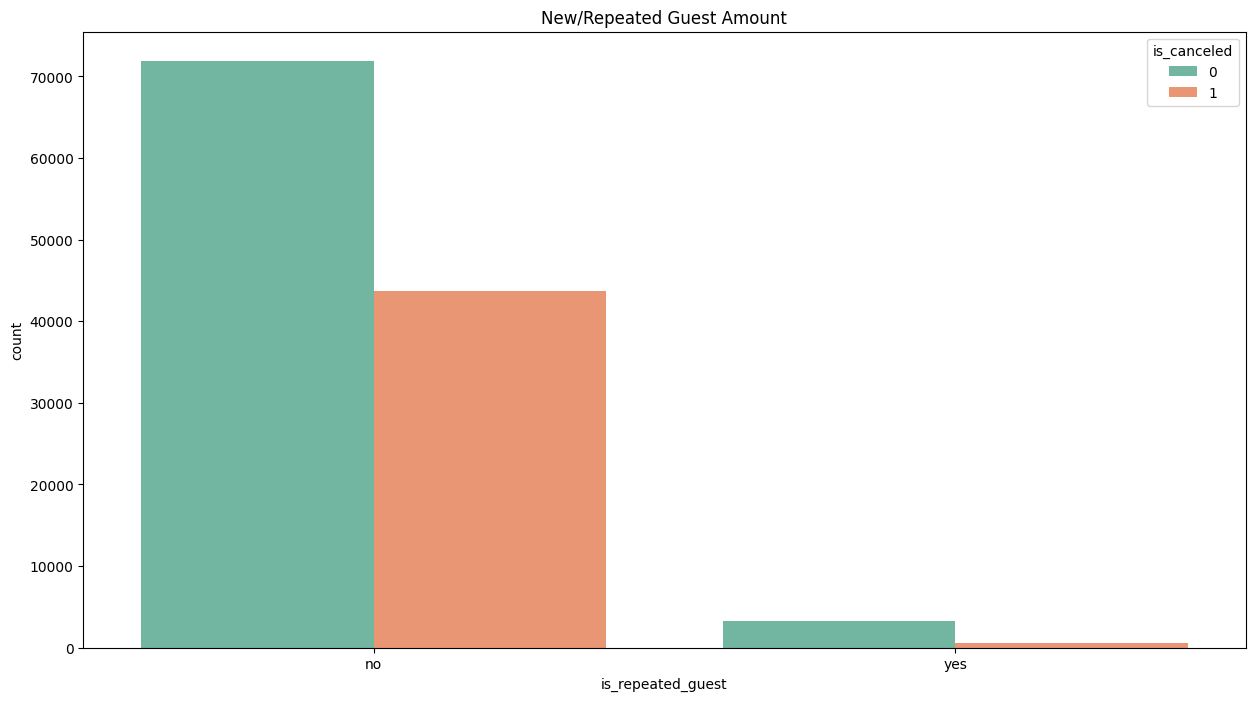

cancellation rate: new guests vs. repeated guests
New Guest         0.377851
Repeated Guest    0.144882
Name: count, dtype: float64


In [12]:
plt.figure(figsize=(15,8))
sns.countplot(
    x="is_repeated_guest",
    data=df,
    hue="is_canceled",
    palette=sns.color_palette("Set2", 2)
)
plt.title("New/Repeated Guest Amount")
plt.xticks(range(2), ["no", "yes"])
plt.show()

guest_cancel = (
    df.loc[df["is_canceled"]==1, "is_repeated_guest"].value_counts()
    / df["is_repeated_guest"].value_counts()
)
guest_cancel.index = ["New Guest", "Repeated Guest"]  # match your label style
print("cancellation rate: new guests vs. repeated guests".center(15), guest_cancel, sep="\n")

# Non Refund → should have very LOW cancellation rate ==> suspicious need to be checked (I dropped it but maybe run a test model without deposit_type

In [13]:
pd.crosstab(df["deposit_type"], df["is_canceled"], normalize="index")

is_canceled,0,1
deposit_type,,
No Deposit,0.716230,0.283770
Non Refund,0.006376,0.993624
Refundable,0.777778,0.222222


3 Deposit types
deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64


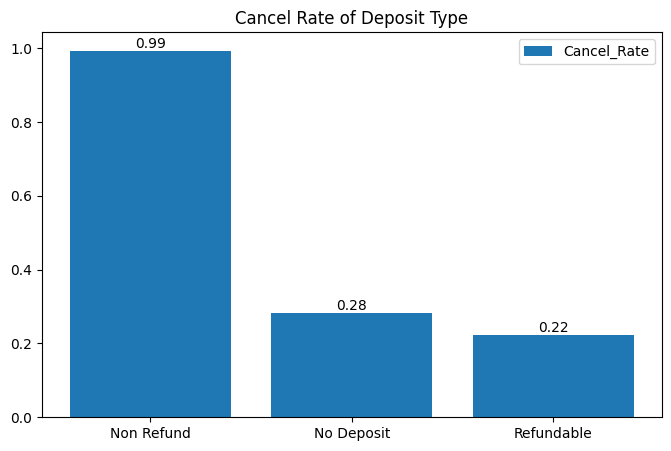

Cancellation rate by deposit type
deposit_type
Non Refund    0.993624
No Deposit    0.283770
Refundable    0.222222
Name: count, dtype: float64


In [14]:


print("3 Deposit types".center(15), df["deposit_type"].value_counts(), sep="\n")

deposit_cancel = (
    df.loc[df["is_canceled"]==1, "deposit_type"].value_counts()
    / df["deposit_type"].value_counts()
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
x = np.arange(len(deposit_cancel.index))
y = deposit_cancel.values
plt.bar(x, y, label="Cancel_Rate")
plt.xticks(x, deposit_cancel.index)
plt.legend()
plt.title("Cancel Rate of Deposit Type")

for xx, yy in zip(x, y):
    plt.text(xx, yy, f"{yy:.2f}", ha="center", va="bottom")

plt.show()

print("Cancellation rate by deposit type".center(15), deposit_cancel, sep="\n")

# Add room type Cancellation Rate!!!!!!!!!!!!

# 3. Data Preprocessing

- The goal is to Predict the if the customer will cancel hotel booking. We set is_canceled as y and the rest of the features as x


## 3.1 Split Data and Avoid Leakage

- We drop reservation_status_date because it represents the date when the final booking outcome was recorded. This information is not available at the time of prediction and therefore should not be used.

- We also remove reservation_status because it directly indicates the final outcome of the booking

In [15]:
df1 = df.copy()

# drop date and status
if "reservation_status_date" in df1.columns:
    df1 = df1.drop(columns=["reservation_status_date"])

if "reservation_status" in df1.columns:
    df1 = df1.drop(columns=["reservation_status"])

df1.shape

(119390, 30)

In [16]:
X = df1.drop(columns=["is_canceled"])
y = df1["is_canceled"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## 3.2 Clean Catagorical Features

- We fixed missing data
- Simplified complex columns into YES/NO features (reserved_room_type, assigned_room_type)
- Removed unnecessary repeated information: agent, company, reserved_room_type, assigned_room_type

In [17]:
# Select all columns with data type "object"
# These are automatically treated as categorical features
cate = df1.columns[df1.dtypes == "object"].tolist()

# Even though agent, company, and is_repeated_guest are numeric,
# they represent IDs or binary categories, not continuous numbers.
# So we manually treat them as categorical-like variables.
num_cate = ["agent", "company", "is_repeated_guest"]
cate = cate + num_cate

In [18]:
# Missing Values
# agent and company have many missing values.
# We replace missing with 0 for not involved
df1[["agent", "company"]] = df1[["agent", "company"]].fillna(0)

# country has a small number of missing values.
# We fill missing country with the most common country (mode).
if df1["country"].isnull().any():
    df1["country"] = df1["country"].fillna(df1["country"].mode()[0])

In [19]:
#Create YES/NO Feature

# Instead of keeping agent/company ID numbers,
# we changed them to binary features: was there an agent/company?
df1.loc[df1["company"] == 0, "in_company"] = "NO"
df1.loc[df1["company"] != 0, "in_company"] = "YES"

df1.loc[df1["agent"] == 0,   "in_agent"]   = "NO"
df1.loc[df1["agent"] != 0,   "in_agent"]   = "YES"

# Check whether reserved room type equals assigned room type.
# If they match → guest got the expected room.
df1.loc[df1["reserved_room_type"] == df1["assigned_room_type"], "same_assignment"] = "Yes"
df1.loc[df1["reserved_room_type"] != df1["assigned_room_type"], "same_assignment"] = "NO"

# Convert is_repeated_guest from 0/1 into clearer labels (NO/YES)
df1.loc[df1["is_repeated_guest"]==0, "is_repeated_guest"] = "NO"
df1.loc[df1["is_repeated_guest"]==1, "is_repeated_guest"] = "YES"

In [20]:
#Remove Columns

# we no longer need original room types or agent/company IDs.
df1 = df1.drop(columns=["reserved_room_type",
                        "assigned_room_type",
                        "agent",
                        "company"])

In [21]:
# Update categorical list

# Add the new categorical features we just created
for c in ["in_company", "in_agent", "same_assignment"]:
    cate.append(c)

# Remove the dropped columns from categorical list (if still present)
for c in ["reserved_room_type","assigned_room_type","agent","company"]:
    if c in cate:
        cate.remove(c)

# Check
cate[:20], len(cate)

(['hotel',
  'arrival_date_month',
  'meal',
  'country',
  'market_segment',
  'distribution_channel',
  'deposit_type',
  'customer_type',
  'is_repeated_guest',
  'in_company',
  'in_agent',
  'same_assignment'],
 12)

## 3.3 Clean Numeric Features

In [22]:
# Identify numeric column

col = df1.columns.tolist()

# Remove target variable (we do not preprocess the label)
col.remove("is_canceled")

# Remove all categorical columns
# What remains in 'col' will be numeric features only
for c in cate:
    if c in col:
        col.remove(c)

col   # Now 'col' contains only continuous numeric features


['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [23]:
# Count missing values in numeric columns
# Sort from highest missing to lowest
df1[col].isnull().sum().sort_values(ascending=False).head(20)

children                          4
lead_time                         0
arrival_date_week_number          0
arrival_date_year                 0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [24]:
# Fill missing ==> childern, with mode
if df1["children"].isnull().any():
    df1["children"] = df1["children"].fillna(df1["children"].mode()[0])

# For safety, if any other numeric column has missing values, fill them with median (robust to outliers)
for c in col:
    if df1[c].isnull().any():
        df1[c] = df1[c].fillna(df1[c].median())

In [25]:
# Standardize numeric features

# Fit scaler on numeric columns and transform them
# This rescales features to mean=0, std=1
# (Important for models sensitive to magnitude differences)
df1.loc[:, col] = ss.fit_transform(df1.loc[:, col])

# Check summary after scaling
df1[col].describe().T.head()

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,6.094277e-17,1.000004,-0.973319,-0.804878,-0.327630,0.523930,5.923385
arrival_date_year,119390.0,-8.406294e-14,1.000004,-1.634768,-0.221286,-0.221286,1.192195,1.192195
arrival_date_week_number,119390.0,-1.295034e-16,1.000004,-1.923191,-0.820662,0.061361,0.796381,1.898910
arrival_date_day_of_month,119390.0,2.475800e-17,1.000004,-1.685297,-0.888102,0.022977,0.820172,1.731251
stays_in_weekend_nights,119390.0,1.197430e-16,1.000004,-0.928890,-0.928890,0.072502,1.073895,18.097569


# 3.4. Correlation Analysis

- Helps see which variables are most related to cancellation 

In [26]:
# Since categorical variables are text,
# we encode them numerically to compute correlation.
df_corr = df1.copy()

# Initialize ordinal encoder
oe = OrdinalEncoder()

# Encode categorical columns to numeric values
df_corr.loc[:, cate] = oe.fit_transform(df_corr.loc[:, cate])

# Compute correlation matrix
corr = df_corr.corr()

# Get absolute correlation values with target
# Sort from smallest to largest
cor_target = corr["is_canceled"].abs().sort_values()

cor_target

arrival_date_month                0.001491
stays_in_weekend_nights           0.001791
children                          0.005036
arrival_date_day_of_month         0.006130
arrival_date_week_number          0.008148
arrival_date_year                 0.016660
meal                              0.017678
stays_in_week_nights              0.024765
babies                            0.032491
adr                               0.047557
days_in_waiting_list              0.054186
previous_bookings_not_canceled    0.057358
market_segment                    0.059338
adults                            0.060017
customer_type                     0.068140
is_repeated_guest                 0.084793
in_company                        0.099310
in_agent                          0.102068
previous_cancellations            0.110133
hotel                             0.136531
booking_changes                   0.144381
distribution_channel              0.167600
required_car_parking_spaces       0.195498
total_of_sp

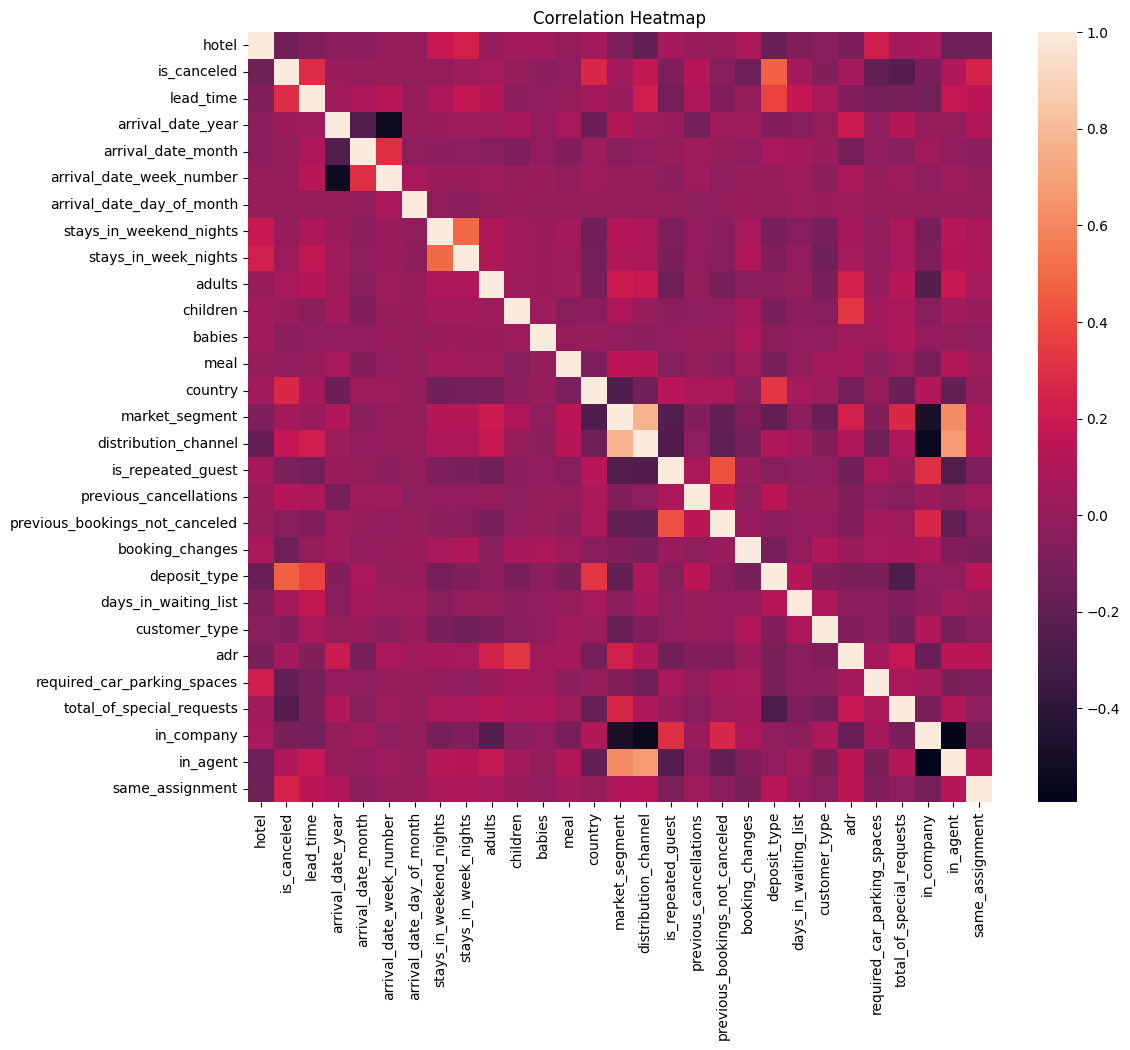

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(corr)
plt.title("Correlation Heatmap")
plt.show()

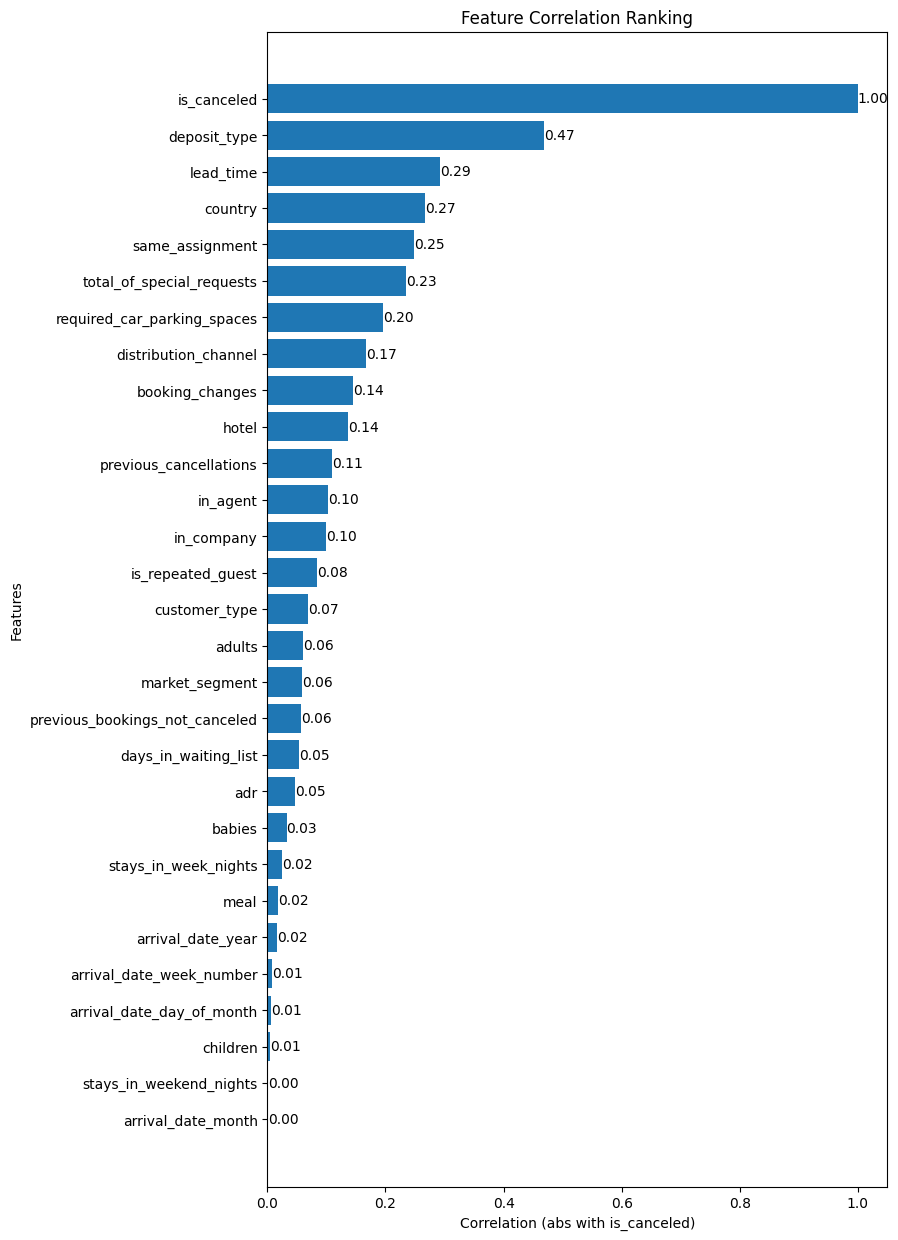

In [28]:
# Bar plot feature correlation ranking with is_canceled: this is more sorted

plt.figure(figsize=(8,15))
y = cor_target.values
names = cor_target.index
x = np.arange(len(names))

plt.barh(x, y)
plt.yticks(x, names)

for xx, yy in zip(x, y):
    plt.text(yy, xx, f"{yy:.2f}", va="center")

plt.xlabel("Correlation (abs with is_canceled)")
plt.ylabel("Features")
plt.title("Feature Correlation Ranking")
plt.show()

- We dropped reservation status previouly now it's deposit types taht has high correlation with is_canceled. 

## 3.5 Encoder on X_train data 

- convert these categories like country names/ booking types into numerical values that the model can process

In [29]:
# Fit encoder on training data
#X = df1.drop(columns=["is_canceled"])
#y = df1["is_canceled"].astype(int)

# encode categoricals for modeling
#oe2 = OrdinalEncoder()
#X.loc[:, cate] = oe2.fit_transform(X.loc[:, cate])

In [30]:
# Drop deposit_type (since high corr and strange from the previous analysis)
df1_no_dep = df1.drop(columns=["deposit_type"])

# Separate X and y
X = df1_no_dep.drop(columns=["is_canceled"])
y = df1_no_dep["is_canceled"].astype(int)

# Rebuild categorical column list (important!)
cate = X.columns[X.dtypes == "object"].tolist()

# Encode categoricals
from sklearn.preprocessing import OrdinalEncoder

oe2 = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X.loc[:, cate] = oe2.fit_transform(X.loc[:, cate])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((95512, 27), (23878, 27))

# 5. Models

we will try logistic regression svm random forest and xgboost